In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_url = '../dataset/15_9-19A-CORE.csv'
df = pd.read_csv(data_url, na_values=' ', usecols=['DEPTH', 'CPOR', 'CKHL', 'CGD'])

In [5]:
df.head()

,DEPTH,CKHL,CPOR,CGD
0,3838.60,11.500,17.0,2.66
1,3838.85,NaN,14.8,2.67
2,3839.15,21.400,10.8,2.69
3,3839.40,0.694,12.8,2.70
4,3839.48,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   728 non-null    float64
 1   CKHL    557 non-null    float64
 2   CPOR    593 non-null    float64
 3   CGD     594 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


In [7]:
df.dropna(inplace=True)

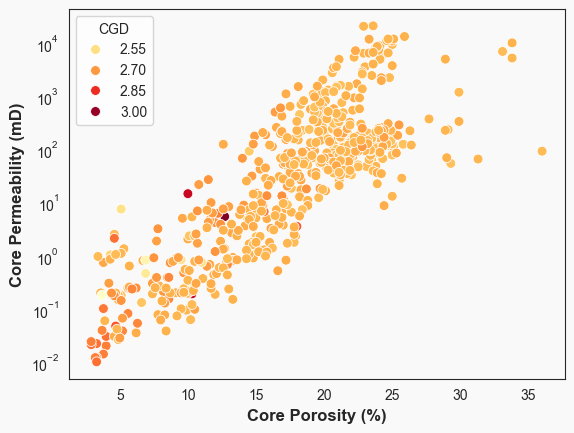

In [22]:
plot = sns.scatterplot(
    x=df['CPOR'],
    y=df['CKHL'],
    hue=df['CGD'],
    palette='YlOrRd',
    s=50
)
plot.set(yscale='log')
plot.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold')
plot.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
plt.show()

In [23]:
x = df['CPOR'].values.reshape(-1, 1)
y = np.log10(df['CKHL'].values).reshape(-1, 1)

In [24]:
model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [25]:
r2_score = model.score(x, y)
print(f'R^2 Score: {r2_score:.4f}')

R^2 Score: 0.7104


In [26]:
model.intercept_, model.coef_

(array([-1.79142803]), array([[0.18299988]]))

In [27]:
regression_equasion = f'log10(CKHL) = {model.intercept_[0]:.4f} + {model.coef_[0][0]:.4f} * CPOR'
print(regression_equasion)

log10(CKHL) = -1.7914 + 0.1830 * CPOR


In [29]:
x_plot_vals = np.arange(0, 50)
y_pred = model.predict(x_plot_vals.reshape(-1, 1))
y_pred_log = 10 ** y_pred
y_pred_log

array([[1.61648610e-02],
       [2.46360938e-02],
       [3.75466958e-02],
       [5.72231287e-02],
       [8.72110418e-02],
       [1.32914190e-01],
       [2.02568179e-01],
       [3.08724503e-01],
       [4.70512293e-01],
       [7.17085350e-01],
       [1.09287559e+00],
       [1.66559957e+00],
       [2.53846088e+00],
       [3.86874719e+00],
       [5.89617311e+00],
       [8.98607629e+00],
       [1.36952504e+01],
       [2.08722780e+01],
       [3.18104437e+01],
       [4.84807804e+01],
       [7.38872456e+01],
       [1.12608028e+02],
       [1.71620525e+02],
       [2.61558659e+02],
       [3.98629080e+02],
       [6.07531573e+02],
       [9.25909901e+02],
       [1.41113513e+03],
       [2.15064376e+03],
       [3.27769360e+03],
       [4.99537652e+03],
       [7.61321516e+03],
       [1.16029382e+04],
       [1.76834848e+04],
       [2.69505560e+04],
       [4.10740573e+04],
       [6.25990121e+04],
       [9.54041694e+04],
       [1.45400945e+05],
       [2.21598647e+05],


In [30]:
predicted_df = pd.DataFrame({
    'CPOR': x_plot_vals,
    'CKHL': y_pred_log.flatten()
})
predicted_df.head()

,CPOR,CKHL
0,0,0.016165
1,1,0.024636
2,2,0.037547
3,3,0.057223
4,4,0.087211


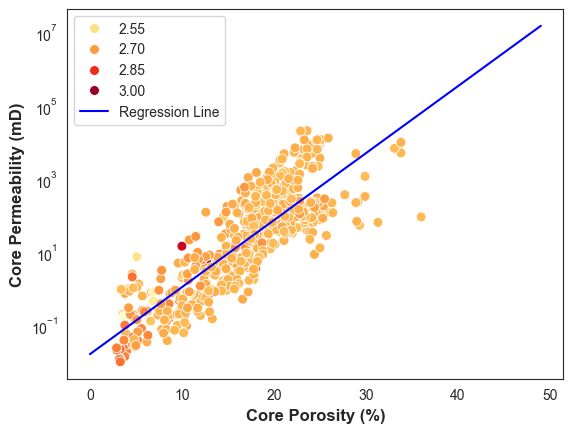

In [31]:
plot = sns.scatterplot(
    x=df['CPOR'],
    y=df['CKHL'],
    hue=df['CGD'],
    palette='YlOrRd',
    s=50
)
plot = sns.lineplot(
    x=predicted_df['CPOR'],
    y=predicted_df['CKHL'],
    color='blue',
    label='Regression Line'
)
plot.set(yscale='log')
plot.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold')
plot.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
plt.show()